In [4]:
! pip install -q tensorflow-hub
! pip install -q seaborn
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns


module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)


[notice] A new release of pip available: 22.2.2 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [5]:
word = "Elephant"
sentence = "I am a sentence for which I would like to get its embedding."
paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")
messages = [word, sentence, paragraph]

# Reduce logging output.
logging.set_verbosity(logging.ERROR)

message_embeddings = embed(messages)

for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
  print("Message: {}".format(messages[i]))
  print("Embedding size: {}".format(len(message_embedding)))
  message_embedding_snippet = ", ".join(
      (str(x) for x in message_embedding[:3]))
  print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

Message: Elephant
Embedding size: 512
Embedding: [0.008344464004039764, 0.00048085112939588726, 0.06595247983932495, ...]

Message: I am a sentence for which I would like to get its embedding.
Embedding size: 512
Embedding: [0.050808604806661606, -0.016524311155080795, 0.015737788751721382, ...]

Message: Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly, the longer the more 'diluted' the embedding will be.
Embedding size: 512
Embedding: [-0.02833266742527485, -0.0558621808886528, -0.012941486202180386, ...]



In [6]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)

['A Combination Prediction Model of Stock Composite Index Based on Artificial Intelligent Methods and Multi-Agent SimulationPredicting stock composite index is useful, which can raise the interest of both the investors and the corresponding researchers', ' This paper presented a new combination prediction model based on the technique of artificial intelligence and the principle of combination forecast', ' The principle of combination forecast, as a valid foundation of the new model, was strictly proved and carefully illustrated in this paper', ' Given the predicting rules, the new combination model was established by synthesizing three commonly used prediction models based on the principle of combination forecast', ' The comprehensive usage of qualitative forecast and quantitative forecast is also a feature of the new model', ' To valid the new model, comparison analysis and multi-agent simulation were both applied', " Besides, the application of multi-agent simulation made the new mod

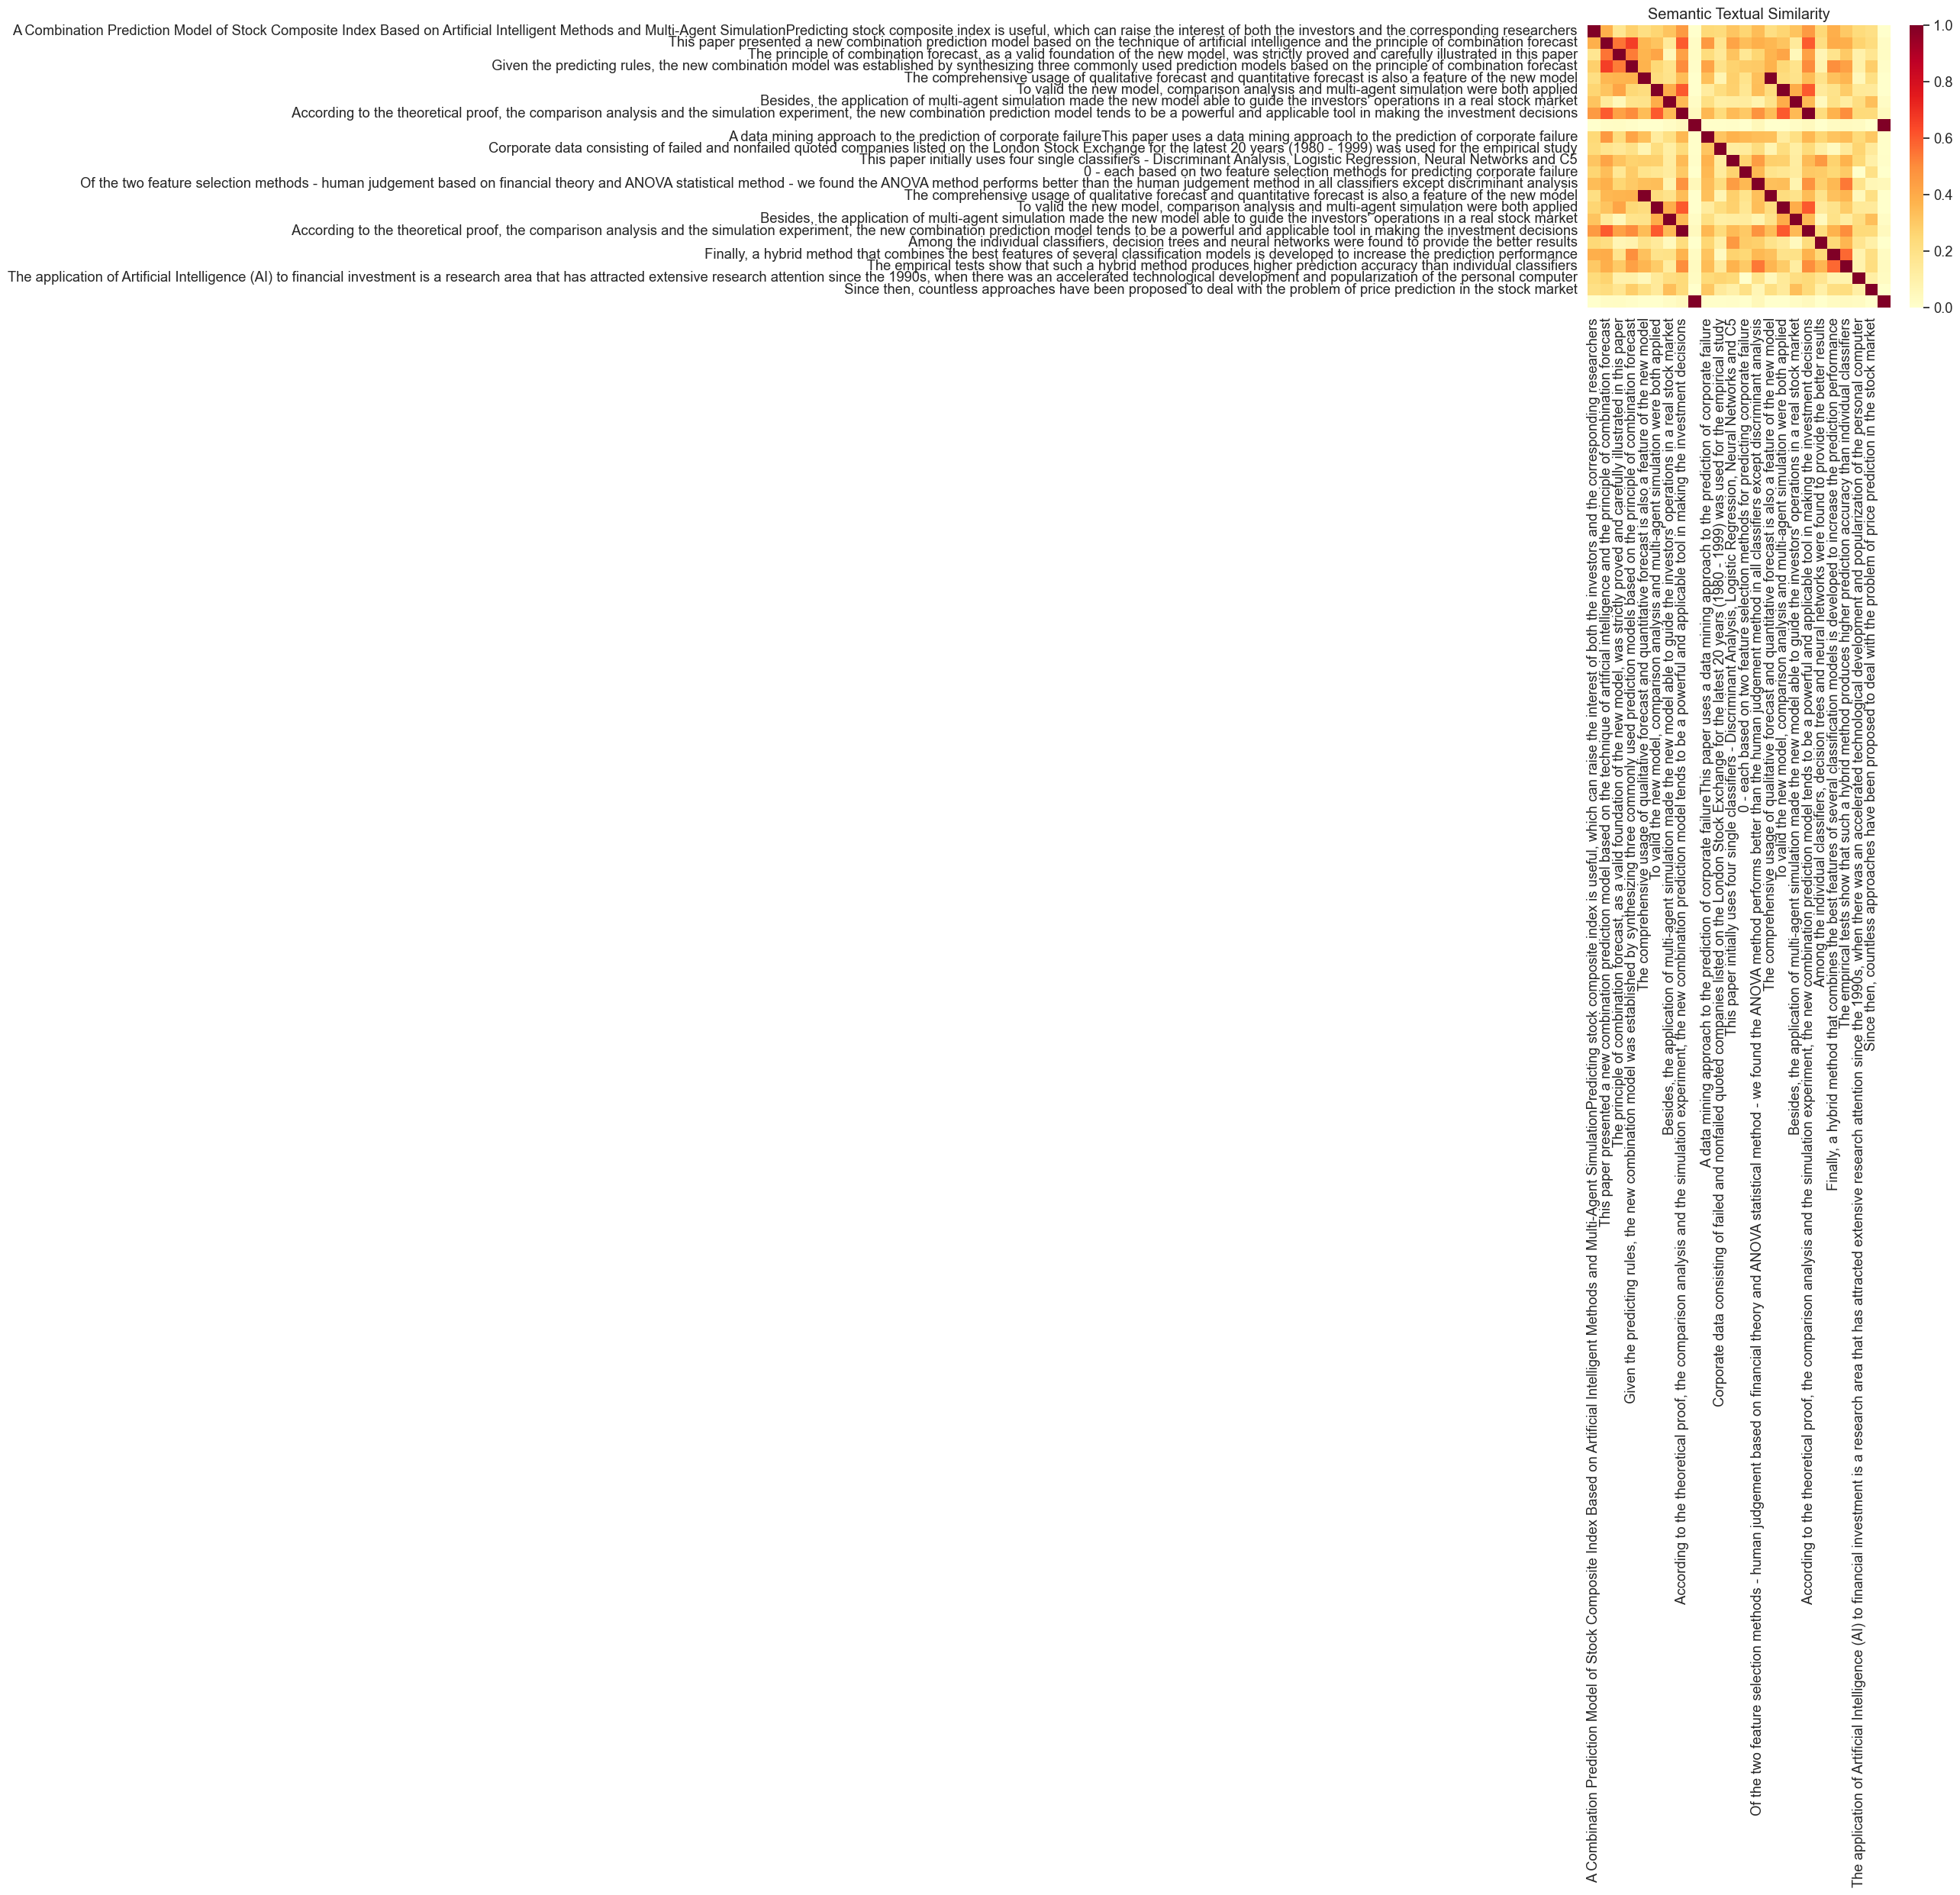

In [12]:
with open('G-A01379566-0.txt', 'r') as file:
        data = file.read().replace('\n', '')


data = data.split('.')
with open('P-A01379566-0.txt', 'r') as file:
        data2 = file.read().replace('\n', '')

data2 = data2.split('.')
data = data + data2

print (data)
# Transform data to vector


messages = data


run_and_plot(messages)